In [20]:
import pandas as pd
import numpy as np
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers.experimental import preprocessing

(-0.5, 223.5, 223.5, -0.5)

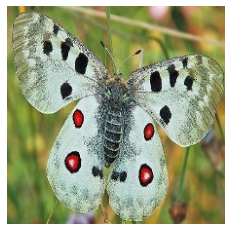

In [21]:
# Plotting the image

path = '/kaggle/input/lepidoptera-species-classification/test/'
rand = np.random.choice(os.listdir(path))
img = Image.open(path+rand)
plt.imshow(img)
plt.axis('off')

In [22]:
# Checking the total length of foleders
le = 0
for  root, dirs, files in os.walk('/kaggle/input/lepidoptera-species-classification/train'):
#     print(f'Theres are {len(files)} files and {len(dirs)} directorie in {root}')
    le  += len(files)
print('Total files :', le)
#     print(root, dirs,files)

Total files : 12639


In [23]:
# loading the dataset


train = image_dataset_from_directory( '/kaggle/input/lepidoptera-species-classification/train',
                                   shuffle=True,seed=42,validation_split=0.25,
                                   subset='training',
                                   label_mode='categorical',
                                   batch_size=64, 
                                   image_size=(64, 64))

test = image_dataset_from_directory( '/kaggle/input/lepidoptera-species-classification/train',
                                   shuffle=False,validation_split=0.25,
                                   subset='validation',
                                   label_mode='categorical',
                                   batch_size=64, 
                                   image_size=(64, 64))

Found 12639 files belonging to 100 classes.
Using 9480 files for training.
Found 12639 files belonging to 100 classes.
Using 3159 files for validation.


In [24]:
classes = train.class_names
len(classes)

100

In [25]:
data = train.take(1)
for X, y in data:
    shape = X.shape

In [26]:
# Creating model
input_shape = shape[1:]

input_layer = layers.Input(shape = input_shape)
x1 = layers.Rescaling(1/255.)(input_layer)
x1 = layers.Conv2D(8, (3,3),activation = 'relu')(x1)
x1 = layers.Conv2D(8, (3,3), activation = 'relu')(x1)
x1 = layers.MaxPool2D((2,2))(x1)
    
x2 = layers.Conv2D(16, (3,3), activation = 'relu',padding = 'same')(x1)
x2 = layers.MaxPool2D((2,2))(x2)
x2 = layers.Dropout(0.2)(x2)
    
x3 = layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x2)
x3 = layers.Dropout(0.2)(x2)
    
x4 = layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x3)
x4 = layers.Dropout(0.2)(x4)

x5_ = layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x4)
x5 = layers.MaxPool2D((2,2))(x5_)
x5 = layers.Dropout(0.2)(x5)

concat = layers.concatenate([x3, x4, x5_])
x6 = layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same')(concat)
x6 = layers.MaxPool2D((2,2))(x6)
x6 = layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x6)
x6 = layers.Dropout(0.2)(x6)
    
x7 = layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x6)
x7 = layers.MaxPool2D((2,2))(x7)
x7 = layers.Dropout(0.2)(x7)

x8 = layers.Flatten()(x7)
x8 = layers.Dense(512, activation = 'relu')(x8)
x8 = layers.Dense(256, activation = 'relu')(x8)
x8 = layers.Dense(128, activation = 'relu')(x8)
x8 = layers.Dense(128, activation = 'relu')(x8)
x8 = layers.Dense(64, activation = 'relu')(x8)
output = layers.Dense(len(classes), activation = 'softmax')(x8)

model_0 = models.Model(input_layer, output)

In [27]:
model_0.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 64, 64, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 62, 62, 8)    224         rescaling_1[0][0]                
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 60, 60, 8)    584         conv2d_9[0][0]                   
____________________________________________________________________________________________

In [28]:
model_0.compile(
loss = 'categorical_crossentropy',
metrics = ['accuracy'],
optimizer = 'Adam')

In [ ]:
history = model_0.fit(train,
                     epochs = 60,
                     steps_per_epoch = len(train),
                     validation_data = test,
                     validation_steps = int(0.2 * len(test)))

Epoch 1/60
149/149 [==============================] - 13s 77ms/step - loss: 4.5048 - accuracy: 0.0152 - val_loss: 4.3458 - val_accuracy: 0.0000e+00
Epoch 2/60
149/149 [==============================] - 9s 61ms/step - loss: 4.2180 - accuracy: 0.0304 - val_loss: 4.2708 - val_accuracy: 0.0016
Epoch 3/60
149/149 [==============================] - 60s 404ms/step - loss: 4.0365 - accuracy: 0.0476 - val_loss: 3.9934 - val_accuracy: 0.0078
Epoch 4/60
149/149 [==============================] - 164s 1s/step - loss: 3.8164 - accuracy: 0.0747 - val_loss: 3.6409 - val_accuracy: 0.0469


In [ ]:
model_0.save('test_model1.h5')

In [ ]:
# model = models.load_model('/kaggle/input/abcdfg/test_model.h5')

In [ ]:
csv = []
path = '/kaggle/input/lepidoptera-species-classification/test/'
for i in os.listdir(path):
    ds = {}
    img = Image.open(path+i)
    resize_img = img.resize((64,64))
    nw_axis_img = np.expand_dims(resize_img, axis = 0)
    
    prediction = model_0.predict(nw_axis_img)
    name = classes[prediction.argmax()]
#     plt.imshow(img)
#     plt.title(name)
#     plt.axis('off')
#     break
    ds['path'] = 'test/'+i
    ds['labels'] = name
    csv.append(ds)
    

In [ ]:
df = pd.DataFrame(csv)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df = df.sort_values(by = 'path')

In [ ]:
df

In [ ]:
df.to_csv('sample_submission.csv', index = False)